In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import pandas_profiling
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
df = pd.read_csv('Puneri-paltan.csv',index_col=0)

In [4]:
df.head()

,OVERALL,SEASON 7,SEASON 6,SEASON 5,SEASON 4,SEASON 3,SEASON 2,SEASON 1,Team-name
SEASONS,,,,,,,,,
MATCHES PLAYED,124.0,18.0,22.0,24.0,16.0,16.0,14.0,14.0,puneri-paltan
WINS,49.0,6.0,8.0,16.0,7.0,8.0,2.0,2.0,puneri-paltan
DRAWS,11.0,3.0,2.0,0.0,2.0,3.0,1.0,0.0,puneri-paltan
LOSSES,64.0,9.0,12.0,8.0,7.0,5.0,11.0,12.0,puneri-paltan
FINISHING POSITION,0.0,8.0,4.0,2.0,4.0,3.0,8.0,8.0,puneri-paltan


In [5]:
df1 = df.transpose()

In [6]:
df2 = df1.apply(pd.to_numeric, errors='coerce')

In [7]:
df2

SEASONS,MATCHES PLAYED,WINS,DRAWS,LOSSES,FINISHING POSITION,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,...,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS
OVERALL,124.0,49.0,11.0,64.0,0.0,5297.0,1651.0,1224.0,2422.0,0.39,...,421.0,2066.0,2924.0,1141.0,1783.0,0.43,122.0,133.0,266.0,1255.0
SEASON 7,18.0,6.0,3.0,9.0,8.0,749.0,254.0,190.0,305.0,0.41,...,73.0,308.0,484.0,189.0,295.0,0.44,22.0,17.0,34.0,211.0
SEASON 6,22.0,8.0,2.0,12.0,4.0,940.0,286.0,228.0,426.0,0.37,...,111.0,346.0,502.0,189.0,313.0,0.44,34.0,14.0,28.0,219.0
SEASON 5,24.0,16.0,0.0,8.0,2.0,1042.0,304.0,223.0,515.0,0.36,...,58.0,379.0,547.0,252.0,295.0,0.50,21.0,32.0,64.0,271.0
SEASON 4,16.0,7.0,2.0,7.0,4.0,716.0,230.0,151.0,335.0,0.40,...,44.0,290.0,345.0,140.0,205.0,0.42,7.0,21.0,42.0,146.0
SEASON 3,16.0,8.0,3.0,5.0,3.0,698.0,203.0,133.0,362.0,0.36,...,36.0,251.0,371.0,174.0,197.0,0.50,13.0,25.0,50.0,187.0
SEASON 2,14.0,2.0,1.0,11.0,8.0,600.0,170.0,151.0,279.0,0.37,...,37.0,223.0,307.0,104.0,203.0,0.37,11.0,12.0,24.0,114.0
SEASON 1,14.0,2.0,0.0,12.0,8.0,552.0,204.0,148.0,200.0,0.49,...,62.0,269.0,368.0,93.0,275.0,0.29,14.0,12.0,24.0,107.0
Team-name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df2['WIN%'] = df2['WINS']/df2['MATCHES PLAYED']
df2['DRAW%'] = df2['DRAWS']/df2['MATCHES PLAYED']
df2['LOSS%'] = df2['LOSSES']/df2['MATCHES PLAYED']
df2['WIN-LOSS%'] = df2['WINS']/df2['LOSSES']


In [10]:
df2.dtypes

SEASONS
MATCHES PLAYED          float64
WINS                    float64
DRAWS                   float64
LOSSES                  float64
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESSFUL RAIDS        float64
UNSUCCESSFUL RAID       float64
EMPTY RAIDS             float64
SUCCESS RAID %          float64
NO. OF SUPER RAIDS      float64
RAID TOUCH POINTS       float64
RAID BONUS POINTS       float64
TOTAL RAID POINTS       float64
TOTAL TACKLES           float64
SUCCESSFUL TACKLES      float64
UNSUCCESFUL TACKLES     float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
ALL OUTS INFLICTED      float64
TOTAL ALL OUT POINTS    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
dtype: object

In [11]:
df2['UNSUCCESSFUL RAID%'] = df2['UNSUCCESSFUL RAID']/df2['TOTAL RAIDS']
df2['EMPTY RAID%'] = df2['EMPTY RAIDS']/df2['TOTAL RAIDS']
df2['AVG_RAID_TOUCH_POINT'] = df2['RAID TOUCH POINTS']/df2['MATCHES PLAYED']
df2['AVG_RAID_BONUS_POINT'] = df2['RAID BONUS POINTS']/df2['MATCHES PLAYED']
df2['UNSUCCESSFUL TACKLE%'] = df2['UNSUCCESFUL TACKLES']/df2['TOTAL TACKLES']
df2['AVG_ALL_OUTS'] = df2['ALL OUTS INFLICTED']/df2['MATCHES PLAYED']

In [12]:
df6 = df2.drop(['MATCHES PLAYED','WINS','DRAWS','LOSSES','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS','NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS'],axis=1)

In [13]:
df6 = df6.drop(['Team-name'],axis=0)
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,5297.0,0.39,0.43,122.0,1255.0,0.395161,0.088710,0.516129,0.765625,0.231074,0.457240,13.266129,3.395161,0.609781,1.072581
SEASON 7,8.0,749.0,0.41,0.44,22.0,211.0,0.333333,0.166667,0.500000,0.666667,0.253672,0.407210,13.055556,4.055556,0.609504,0.944444
SEASON 6,4.0,940.0,0.37,0.44,34.0,219.0,0.363636,0.090909,0.545455,0.666667,0.242553,0.453191,10.681818,5.045455,0.623506,0.636364
SEASON 5,2.0,1042.0,0.36,0.50,21.0,271.0,0.666667,0.000000,0.333333,2.000000,0.214012,0.494242,13.375000,2.416667,0.539305,1.333333
SEASON 4,4.0,716.0,0.40,0.42,7.0,146.0,0.437500,0.125000,0.437500,1.000000,0.210894,0.467877,15.375000,2.750000,0.594203,1.312500
SEASON 3,3.0,698.0,0.36,0.50,13.0,187.0,0.500000,0.187500,0.312500,1.600000,0.190544,0.518625,13.437500,2.250000,0.530997,1.562500
SEASON 2,8.0,600.0,0.37,0.37,11.0,114.0,0.142857,0.071429,0.785714,0.181818,0.251667,0.465000,13.285714,2.642857,0.661238,0.857143
SEASON 1,8.0,552.0,0.49,0.29,14.0,107.0,0.142857,0.000000,0.857143,0.166667,0.268116,0.362319,14.785714,4.428571,0.747283,0.857143


In [14]:
df6.dtypes

SEASONS
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESS RAID %          float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64
AVG_ALL_OUTS            float64
dtype: object

In [15]:
df6.corr().iplot(kind='heatmap',colorscale='ylgn')

In [16]:
df3= df2.loc['SEASON 5',:]

In [17]:
df3 

SEASONS
MATCHES PLAYED            24.000000
WINS                      16.000000
DRAWS                      0.000000
LOSSES                     8.000000
FINISHING POSITION         2.000000
TOTAL RAIDS             1042.000000
SUCCESSFUL RAIDS         304.000000
UNSUCCESSFUL RAID        223.000000
EMPTY RAIDS              515.000000
SUCCESS RAID %             0.360000
NO. OF SUPER RAIDS        12.000000
RAID TOUCH POINTS        321.000000
RAID BONUS POINTS         58.000000
TOTAL RAID POINTS        379.000000
TOTAL TACKLES            547.000000
SUCCESSFUL TACKLES       252.000000
UNSUCCESFUL TACKLES      295.000000
SUCCESSFUL TACKLE %        0.500000
NO. OF SUPER TACKLES      21.000000
ALL OUTS INFLICTED        32.000000
TOTAL ALL OUT POINTS      64.000000
TOTAL DEFENCE POINTS     271.000000
WIN%                       0.666667
DRAW%                      0.000000
LOSS%                      0.333333
WIN-LOSS%                  2.000000
UNSUCCESSFUL RAID%         0.214012
EMPTY RAID%         

In [18]:
df3.iplot(kind='bar')

In [19]:
df4 =df6.drop('FINISHING POSITION',axis=1)
df4 =df4.drop(['SEASON 7'])
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,5297.0,0.39,0.43,122.0,1255.0,0.395161,0.088710,0.516129,0.765625,0.231074,0.457240,13.266129,3.395161,0.609781,1.072581
SEASON 6,940.0,0.37,0.44,34.0,219.0,0.363636,0.090909,0.545455,0.666667,0.242553,0.453191,10.681818,5.045455,0.623506,0.636364
SEASON 5,1042.0,0.36,0.50,21.0,271.0,0.666667,0.000000,0.333333,2.000000,0.214012,0.494242,13.375000,2.416667,0.539305,1.333333
SEASON 4,716.0,0.40,0.42,7.0,146.0,0.437500,0.125000,0.437500,1.000000,0.210894,0.467877,15.375000,2.750000,0.594203,1.312500
SEASON 3,698.0,0.36,0.50,13.0,187.0,0.500000,0.187500,0.312500,1.600000,0.190544,0.518625,13.437500,2.250000,0.530997,1.562500
SEASON 2,600.0,0.37,0.37,11.0,114.0,0.142857,0.071429,0.785714,0.181818,0.251667,0.465000,13.285714,2.642857,0.661238,0.857143
SEASON 1,552.0,0.49,0.29,14.0,107.0,0.142857,0.000000,0.857143,0.166667,0.268116,0.362319,14.785714,4.428571,0.747283,0.857143


In [20]:
df5 = df6['FINISHING POSITION']
df5 = df5.drop(['SEASON 7'],axis=0)
#df5['FINISHING POSITION'] = df['FINISHING POSITION'].fillna(0)
df5

OVERALL     0.0
SEASON 6    4.0
SEASON 5    2.0
SEASON 4    4.0
SEASON 3    3.0
SEASON 2    8.0
SEASON 1    8.0
Name: FINISHING POSITION, dtype: float64

In [21]:
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,5297.0,0.39,0.43,122.0,1255.0,0.395161,0.088710,0.516129,0.765625,0.231074,0.457240,13.266129,3.395161,0.609781,1.072581
SEASON 6,940.0,0.37,0.44,34.0,219.0,0.363636,0.090909,0.545455,0.666667,0.242553,0.453191,10.681818,5.045455,0.623506,0.636364
SEASON 5,1042.0,0.36,0.50,21.0,271.0,0.666667,0.000000,0.333333,2.000000,0.214012,0.494242,13.375000,2.416667,0.539305,1.333333
SEASON 4,716.0,0.40,0.42,7.0,146.0,0.437500,0.125000,0.437500,1.000000,0.210894,0.467877,15.375000,2.750000,0.594203,1.312500
SEASON 3,698.0,0.36,0.50,13.0,187.0,0.500000,0.187500,0.312500,1.600000,0.190544,0.518625,13.437500,2.250000,0.530997,1.562500
SEASON 2,600.0,0.37,0.37,11.0,114.0,0.142857,0.071429,0.785714,0.181818,0.251667,0.465000,13.285714,2.642857,0.661238,0.857143
SEASON 1,552.0,0.49,0.29,14.0,107.0,0.142857,0.000000,0.857143,0.166667,0.268116,0.362319,14.785714,4.428571,0.747283,0.857143


In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = df4
y= df5
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


(7, 7)

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['FEATURES','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                FEATURES         Score
0            TOTAL RAIDS  12670.112138
4   TOTAL DEFENCE POINTS   3103.903871
3   NO. OF SUPER TACKLES    302.905405
8              WIN-LOSS%      3.049195
12  AVG_RAID_BONUS_POINT      0.828361


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[0.0245614  0.         0.0877193  0.10438596 0.05877193 0.18473684
 0.         0.10789474 0.13377193 0.04052632 0.03736842 0.
 0.01842105 0.15640351 0.0454386 ]


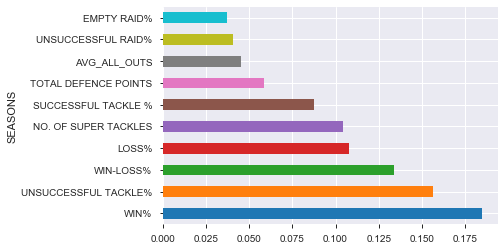

In [24]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [25]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'WIN%', 'DRAW%', 'LOSS%',
       'WIN-LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS'],
      dtype='object')


In [26]:
X_features = df4.filter(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'WIN%', 'DRAW%', 'LOSS%',
       'WIN-LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS'],axis=1)
X_features.shape

(7, 12)

In [26]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks


Using Theano backend.



You can find the C code in this temporary file: C:\Users\ANINDA~1.BHA\AppData\Local\Temp\theano_compilation_error_3mobqmqx


Exception: Compilation failed (return status=1): C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `_import_array':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1470: undefined reference to `__imp_PyExc_ImportError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1476: undefined reference to `__imp_PyExc_AttributeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1481: undefined reference to `__imp_PyCapsule_Type'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1482: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1497: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1505: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1511: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1521: undefined reference to `__imp_PyExc_RuntimeError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o:D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1533: more undefined references to `__imp_PyExc_RuntimeError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `NpyCapsule_Check':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/npy_3kcompat.h:468: undefined reference to `__imp_PyCapsule_Type'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `unpack_list_of_ssize_t':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:48: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:58: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:352: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:370: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:385: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:389: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:393: more undefined references to `__imp_PyExc_IndexError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:405: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:420: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:426: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:440: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:444: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `c_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `lazy_rec_eval':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:618: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:641: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:649: undefined reference to `__imp_PyExc_ValueError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:657: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:708: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:715: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:721: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:772: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:814: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:826: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:840: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:850: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:894: undefined reference to `__imp_PyExc_AssertionError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:938: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `CLazyLinker_set_allow_gc':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:973: undefined reference to `__imp_PyBool_Type'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:976: undefined reference to `__imp__Py_TrueStruct'. collect2.exe: error: ld returned 1 exit status. 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_features, y, epochs=150, batch_size=10)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_features, y)
print('Accuracy: %.2f' % (accuracy*100))

In [27]:
f_select = ['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'WIN%', 'DRAW%', 'LOSS%',
       'WIN-LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS']
f_select

['SUCCESS RAID %',
 'SUCCESSFUL TACKLE %',
 'WIN%',
 'DRAW%',
 'LOSS%',
 'WIN-LOSS%',
 'UNSUCCESSFUL RAID%',
 'EMPTY RAID%',
 'AVG_RAID_TOUCH_POINT',
 'AVG_RAID_BONUS_POINT',
 'UNSUCCESSFUL TACKLE%',
 'AVG_ALL_OUTS']

In [28]:
#Using PCA to transform and decouple the dataset defined by the selected features
from sklearn.decomposition import PCA
pca = PCA()  
XX = pca.fit_transform(X[f_select]) # XX is out new training matrix that has two basis vectors
XX

array([[ 2.38813177e-01,  6.37061739e-02,  6.54228386e-02,
        -6.76733029e-02,  4.33354951e-02,  4.51003961e-02,
         1.49174950e-16],
       [ 3.32361222e+00,  1.03455195e-01, -2.21037118e-01,
        -3.00347559e-02,  2.82086300e-02, -1.51795004e-02,
         1.49174950e-16],
       [-4.87154340e-01, -1.30086616e+00, -4.01951883e-01,
         2.10638450e-01,  2.94561658e-03,  2.79447110e-03,
         1.49174950e-16],
       [-1.94710244e+00,  4.14404246e-01, -2.12553489e-01,
        -7.60657033e-02,  1.03422937e-01, -1.93198070e-02,
         1.49174950e-16],
       [-6.10519953e-01, -1.19824123e+00, -3.97668469e-02,
        -1.66286329e-01, -9.55394889e-02, -6.32354779e-03,
         1.49174950e-16],
       [-3.51484418e-02,  1.73694784e-02,  1.06366799e+00,
         7.02260011e-02,  1.41396683e-03, -8.60396688e-03,
         1.49174950e-16],
       [-4.82500230e-01,  1.90017230e+00, -2.53781496e-01,
         5.91956401e-02, -8.37871567e-02,  1.53195484e-03,
         1.4917495

In [29]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,5297.0,0.39,0.43,122.0,1255.0,0.395161,0.088710,0.516129,0.765625,0.231074,0.457240,13.266129,3.395161,0.609781,1.072581
SEASON 7,8.0,749.0,0.41,0.44,22.0,211.0,0.333333,0.166667,0.500000,0.666667,0.253672,0.407210,13.055556,4.055556,0.609504,0.944444
SEASON 6,4.0,940.0,0.37,0.44,34.0,219.0,0.363636,0.090909,0.545455,0.666667,0.242553,0.453191,10.681818,5.045455,0.623506,0.636364
SEASON 5,2.0,1042.0,0.36,0.50,21.0,271.0,0.666667,0.000000,0.333333,2.000000,0.214012,0.494242,13.375000,2.416667,0.539305,1.333333
SEASON 4,4.0,716.0,0.40,0.42,7.0,146.0,0.437500,0.125000,0.437500,1.000000,0.210894,0.467877,15.375000,2.750000,0.594203,1.312500
SEASON 3,3.0,698.0,0.36,0.50,13.0,187.0,0.500000,0.187500,0.312500,1.600000,0.190544,0.518625,13.437500,2.250000,0.530997,1.562500
SEASON 2,8.0,600.0,0.37,0.37,11.0,114.0,0.142857,0.071429,0.785714,0.181818,0.251667,0.465000,13.285714,2.642857,0.661238,0.857143
SEASON 1,8.0,552.0,0.49,0.29,14.0,107.0,0.142857,0.000000,0.857143,0.166667,0.268116,0.362319,14.785714,4.428571,0.747283,0.857143


In [31]:
X_train = X
y_train =y 
X_test = df6.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)
X_test = X_test.drop(['FINISHING POSITION'], axis=1)
y_test = df6['FINISHING POSITION']
y_test = y_test.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)

In [32]:
X_test

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
SEASON 7,749.0,0.41,0.44,22.0,211.0,0.333333,0.166667,0.5,0.666667,0.253672,0.40721,13.055556,4.055556,0.609504,0.944444


In [33]:
y_test

SEASON 7    8.0
Name: FINISHING POSITION, dtype: float64

In [34]:
# machine learning
from sklearn.svm import SVC
from sklearn import preprocessing
#import fancyimpute
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#  Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Models
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [35]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[21:01:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.24822	validation_1-rmse:7.09167
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:3.95974	validation_1-rmse:6.68433
[2]	validation_0-rmse:3.6924	validation_1-rmse:6.50044
[3]	validation_0-rmse:3.44335	validation_1-rmse:6.33034
[4]	validation_0-rmse:3.21133	validation_1-rmse:6.17299
[5]	validation_0-rmse:2.99519	validation_1-rmse:6.02745
[6]	validation_0-rmse:2.79122	validation_1-rmse:5.8977
[7]	validation_0-rmse:2.60162	validation_1-rmse:5.77832
[8]	validation_0-rmse:2.42539	validation_1-rmse:5.6685
[9]	validation_0-rmse:2.26415	validation_1-rmse:5.58391
[10]	validation_0-rmse:2.11315	validation_1-rmse:5.35051
[11]	validation_0-rmse:1.97071	validation_1-rmse:5.26862
[12]	v

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[73]	validation_0-rmse:0.02788	validation_1-rmse:4.00539
[74]	validation_0-rmse:0.026035	validation_1-rmse:4.0043
[75]	validation_0-rmse:0.024313	validation_1-rmse:4.00338
[76]	validation_0-rmse:0.022704	validation_1-rmse:4.00242
[77]	validation_0-rmse:0.021203	validation_1-rmse:4.00152
[78]	validation_0-rmse:0.019801	validation_1-rmse:4.00069
[79]	validation_0-rmse:0.018493	validation_1-rmse:4
[80]	validation_0-rmse:0.017299	validation_1-rmse:3.99785
[81]	validation_0-rmse:0.016185	validation_1-rmse:3.99585
[82]	validation_0-rmse:0.015145	validation_1-rmse:3.99398
[83]	validation_0-rmse:0.014175	validation_1-rmse:3.99243
[84]	validation_0-rmse:0.013262	validation_1-rmse:3.99208
[85]	validation_0-rmse:0.012414	validation_1-rmse:3.99169
[86]	validation_0-rmse:0.011614	validation_1-rmse:3.99025
[87]	validation_0-rmse:0.010867	validation_1-rmse:3.98891
[88]	validation_0-rmse:0.010168	validation_1-rmse:3.98766
[89]	validation_0-rmse:0.009515	validation_1-rmse:3.98649
[90]	validation_0-rmse

[213]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[214]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[215]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[216]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[217]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[218]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[219]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[220]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[221]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[222]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[223]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[224]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[225]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[226]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[227]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[228]	validation_0-rmse:0.000565	validation_1-rmse:3.97736
[229]	validation_0-rmse:0.000565	validation_1-rmse:3.977

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [36]:
pred  = pd.DataFrame()
pred['MW_Prediction'] = reg.predict(X_test)


In [37]:
pred['MW_Prediction']

0    4.022639
Name: MW_Prediction, dtype: float32

In [38]:
predict = reg.predict(X_test)
predictions = [round(value) for value in predict]
predictions

[4.0]

## Finding the win-loss% of a team for Season 7

In [15]:
df6.loc['SEASON 7','WIN-LOSS%']

0.6666666666666666

## Finding the successful Raid %(successful raid/ total raid) for season 7

In [16]:
SUCC_RAID =df2.loc['SEASON 7','SUCCESSFUL RAIDS']
TOT_RAID = df2.loc['SEASON 7','TOTAL RAIDS']

SUCC_RAID_PERC = SUCC_RAID/TOT_RAID
SUCC_RAID_PERC

0.3391188251001335

## Finding the OVERALL successful Raid %(successful raid/ total raid) of a team

In [17]:
SUCC_RAID_OV =df2.loc['OVERALL','SUCCESSFUL RAIDS']
TOT_RAID_OV = df2.loc['OVERALL','TOTAL RAIDS']

SUCC_RAID_PERC_OV = SUCC_RAID_OV/TOT_RAID_OV
SUCC_RAID_PERC_OV

0.31168585992070985

## Finding the successful tackles % for season 7

In [19]:
SUCC_TACKLES =df2.loc['SEASON 7','SUCCESSFUL TACKLES']
TOT_TACKLES = df2.loc['SEASON 7','TOTAL TACKLES']

SUCC_TACKLES_PERC = SUCC_TACKLES/TOT_TACKLES
SUCC_TACKLES_PERC

0.390495867768595

## Finding the Super-performance total of the team

In [18]:
SUPER_RAIDS = df2.loc['SEASON 7','NO. OF SUPER RAIDS']
SUPER_TACKLES = df2.loc['SEASON 7','NO. OF SUPER TACKLES']
All_OUTS_INFLICTED = df2.loc['SEASON 7','ALL OUTS INFLICTED']
All_OUTS_CONCEDED = 29

SPT = SUPER_RAIDS+SUPER_TACKLES+All_OUTS_INFLICTED-All_OUTS_CONCEDED
SPT

16.0